In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c19c34c4d81022e8d915d322880d867a


In [3]:
# Create a list of random latitude and longitude combinations:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrive data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamenka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | ambunti
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | hilo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | that phanom
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | chapais
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | pasighat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | paka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | albany


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | sumbawa
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | ribeira grande
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | portland
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | basoko
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | falealupo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | qaanaaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | belushya guba
City not found. Ski

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | mezhdurechenskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | tuggurt
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | praia da vitoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | barinas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | mwanza
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | nishihara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | baykit
-----------------------------
Data Retrieval

Processing Record 37 of Set 4 | guerrero negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | osoyoos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | doka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | mar del plata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | shache
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | bure
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | jining
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | novikovo
-----------------------------
Data Retrieval

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | aros
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | berdigestyakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | vila franca do campo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | blind river
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | rovnoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | kaitangata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | tilichiki
-----------------------------
Data Retrieval Complete      
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | dingle
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | zhangye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | choix
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | brigantine
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | kamaishi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | zhanatas
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | eenhana
-----------------------------
Data Retrieval Complete      


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | ostrovnoy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | maqrin
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | monrovia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | tanout
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | tondano
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | pacific grove
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | namibe
-----------------------------
Data Retrieval Complete   

Processing Record 36 of Set 9 | bougouni
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | cumana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | grand river south east
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | ban nahin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | tual
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | itoman
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | luena
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | wyszkow
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | kavieng
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | homer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | nagato
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | bolungarvik
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | kununurra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | imeni poliny osipenko
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | galle
-----------------------------
Data Retrieval

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | serenje
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | salinopolis
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | ploemeur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | torbay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | nguiu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | santa cruz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | gat
-----------------------------
Data Retrieval Complete  

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 13 | tabiauea
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 13 | belyy yar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 13 | tuy hoa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 13 | rio rita
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 13 | tura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 13 | kindu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,45.28,82,3,9.08,RU,2022-04-27 23:10:30
1,Ambunti,-4.2365,142.8448,79.48,84,99,1.03,PG,2022-04-27 23:10:31
2,Hilo,19.7297,-155.0900,86.29,80,100,9.22,US,2022-04-27 23:10:31
3,That Phanom,16.9364,104.7104,80.85,73,34,4.83,TH,2022-04-27 23:10:32
4,Chapais,49.7834,-74.8492,30.04,70,79,13.96,CA,2022-04-27 23:10:32


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamenka,RU,2022-04-27 23:10:30,51.3223,42.7678,45.28,82,3,9.08
1,Ambunti,PG,2022-04-27 23:10:31,-4.2365,142.8448,79.48,84,99,1.03
2,Hilo,US,2022-04-27 23:10:31,19.7297,-155.0900,86.29,80,100,9.22
3,That Phanom,TH,2022-04-27 23:10:32,16.9364,104.7104,80.85,73,34,4.83
4,Chapais,CA,2022-04-27 23:10:32,49.7834,-74.8492,30.04,70,79,13.96


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

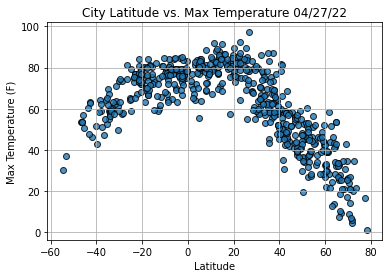

In [14]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

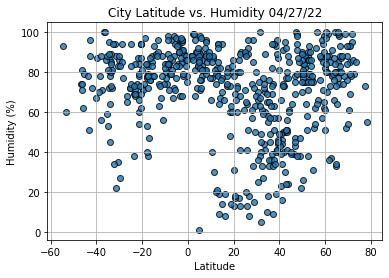

In [15]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

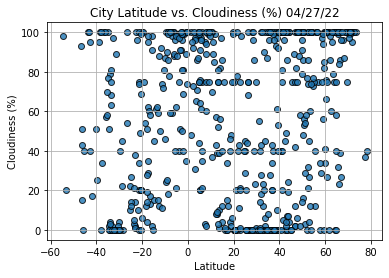

In [16]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

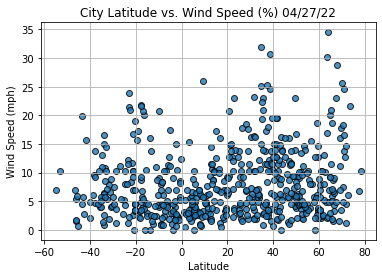

In [17]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Tocopilla
Country                        CL
Date          2022-04-27 23:10:35
Lat                       -22.092
Lng                      -70.1979
Max Temp                     67.1
Humidity                       74
Cloudiness                     96
Wind Speed                   8.32
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamenka,RU,2022-04-27 23:10:30,51.3223,42.7678,45.28,82,3,9.08
2,Hilo,US,2022-04-27 23:10:31,19.7297,-155.0900,86.29,80,100,9.22
3,That Phanom,TH,2022-04-27 23:10:32,16.9364,104.7104,80.85,73,34,4.83
4,Chapais,CA,2022-04-27 23:10:32,49.7834,-74.8492,30.04,70,79,13.96
5,Pasighat,IN,2022-04-27 23:10:32,28.0667,95.3333,68.45,74,100,3.62


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

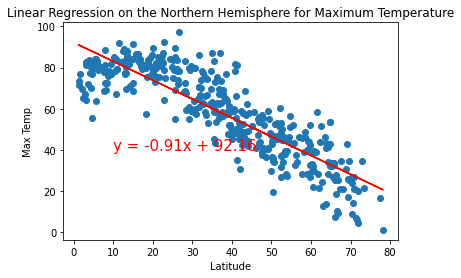

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                       "Max Temp", (10,40))

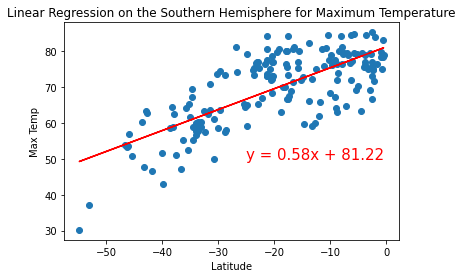

In [41]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", 
                       "Max Temp", (-25,50))

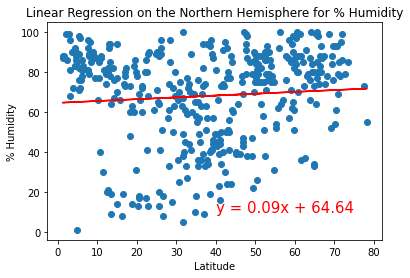

In [44]:
# Linear regression on the Northern Hemisphere latitudes and humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity", 
                       "% Humidity", (40,10))

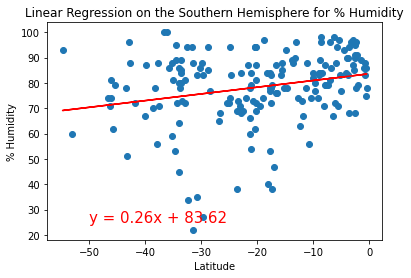

In [49]:
# Linear regression on the Southern Hemisphere latitudes and humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Humidity", 
                       "% Humidity", (-50,25))

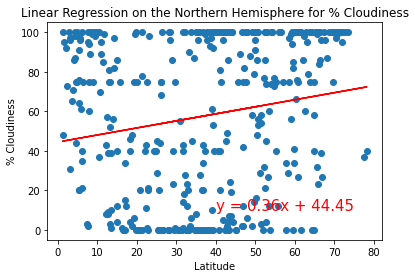

In [54]:
# Linear regression on the Northern Hemisphere latitudes and cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness", (40,10))

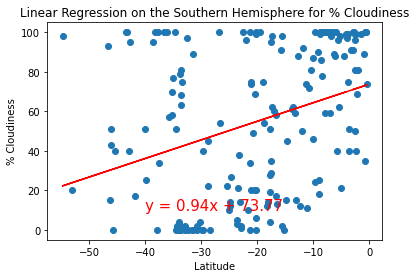

In [55]:
# Linear regression on the Southern Hemisphere latitudes and cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness", (-40,10))

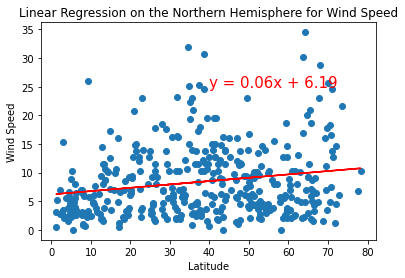

In [57]:
# Linear regression on the Northern Hemisphere latitudes and wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed",(40,25))

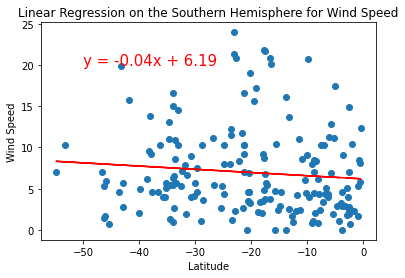

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed",(-50,20))